In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
#Loading the Data to Pandas DataFrame

psngr_data = pd.read_csv('D://Data Trained//Internship//Projects//Project Details//2nd_Practice phase//data-2_.csv')
psngr_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Rows and Columns details of the dataset

psngr_data.shape

(891, 12)

In [4]:
#checking if any missing values/null values in the dataset

psngr_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#checking if any duplicate values in the dataset

psngr_data.duplicated().sum()

0

In [6]:
#checking no. of unique values in all the attributes

psngr_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
#general information of the dataset

psngr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Handling missing values in the dataset

#dropping the cabin column as it has almost of missing values

psngr_data = psngr_data.drop(columns=['Cabin'], axis=1)
psngr_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
#replacing the missing values in age column with mean value of age column

psngr_data['Age'].fillna(psngr_data['Age'].mean(), inplace=True)

In [10]:
#filling the Mode value(most repeated value) of Embarked column for missing values in Embarked column

#to find most repeated values in the 'Embarked' column data
print(psngr_data['Embarked'].mode()[0]) #putting index as [0] to print only 'S' value

#to replace the missing values with the most repeated value from the 'Embarked' column
psngr_data['Embarked'].fillna(psngr_data['Embarked'].mode()[0], inplace=True)

S


In [11]:
#Checking again for missing values

psngr_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
#Statistical details of the dataset

psngr_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#Classifying the categorical columns into integer numbers

psngr_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)
psngr_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


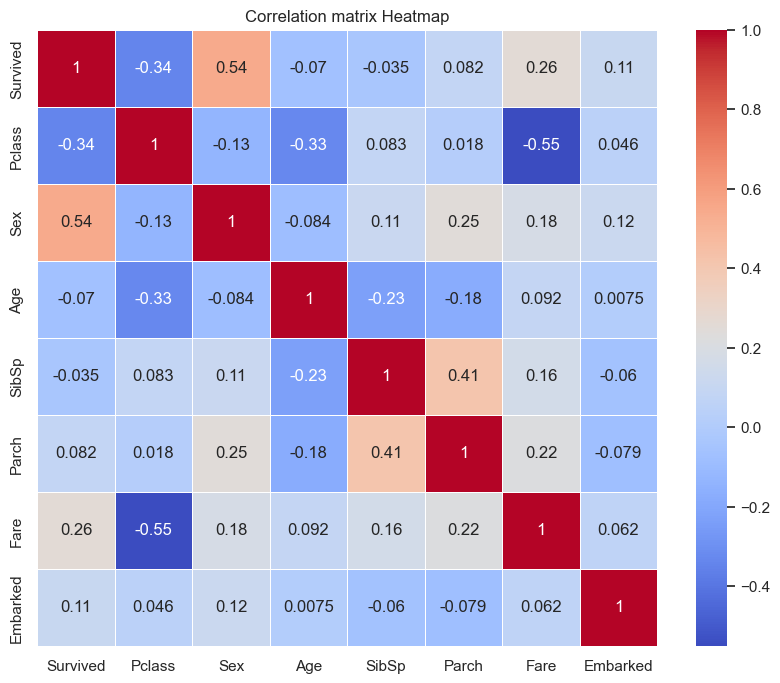

Survived    1.000000
Sex         0.543351
Fare        0.257307
Embarked    0.106811
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64


In [17]:
#Visualizing by Heatmap to understand the correlation between all the effective columns of the dataset

data_corr = psngr_data.drop(columns=['PassengerId', 'Name', 'Ticket']).corr() #dropping the non effective columns from the dataset
plt.figure(figsize=(10,8))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix Heatmap')
plt.show()

print(data_corr['Survived'].sort_values(ascending=False)) #to print the correlation of target/labeled column with other columns 

In [18]:
#Applying Default appearance of matplotlib plot for appaealing Data Visualization

sns.set()

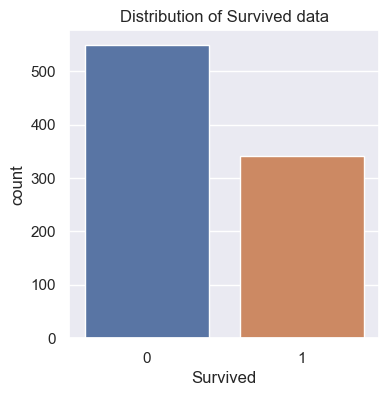

Survived
0    549
1    342
Name: count, dtype: int64


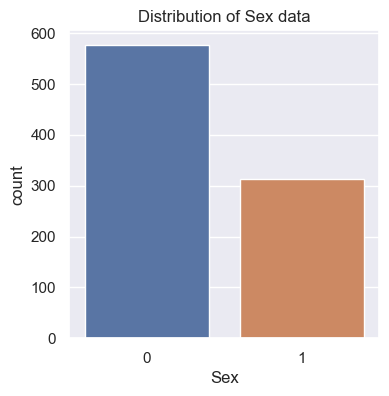

Sex
0    577
1    314
Name: count, dtype: int64


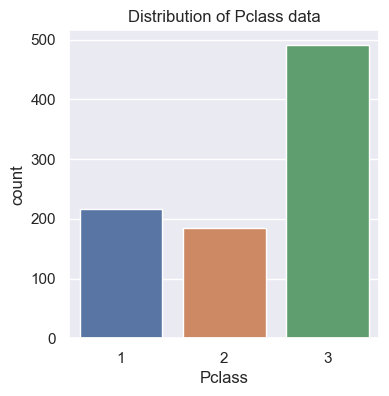

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


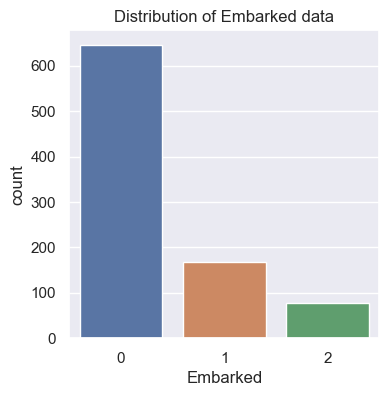

Embarked
0    646
1    168
2     77
Name: count, dtype: int64


In [19]:
#making count plots for the dataset

count_data = psngr_data[['Survived', 'Sex', 'Pclass', 'Embarked']]

for dcount in count_data:
    plt.figure(figsize=(4,4))
    sns.countplot(x=psngr_data[dcount])
    plt.title(f'Distribution of {dcount} data')
    plt.xlabel(dcount)
    plt.show()
    print(psngr_data[dcount].value_counts())

Sex  Survived
0    0           468
1    1           233
0    1           109
1    0            81
Name: count, dtype: int64


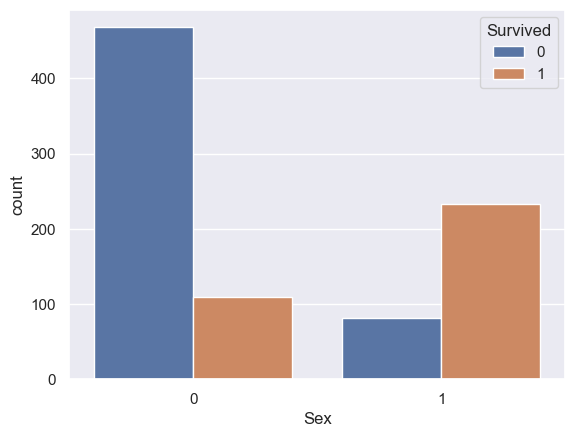

In [20]:
#no of survivals gender wise

sns.countplot(x='Sex', hue='Survived', data=psngr_data)

print(psngr_data[['Sex', 'Survived']].value_counts())

Pclass  Survived
3       0           372
1       1           136
3       1           119
2       0            97
        1            87
1       0            80
Name: count, dtype: int64


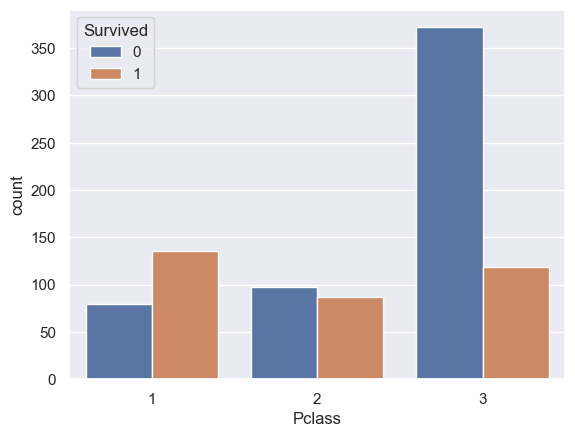

In [21]:
#no of survivals Pclass wise

sns.countplot(x='Pclass', hue='Survived', data=psngr_data)

print(psngr_data[['Pclass', 'Survived']].value_counts())

Embarked  Survived
0         0           427
          1           219
1         1            93
          0            75
2         0            47
          1            30
Name: count, dtype: int64


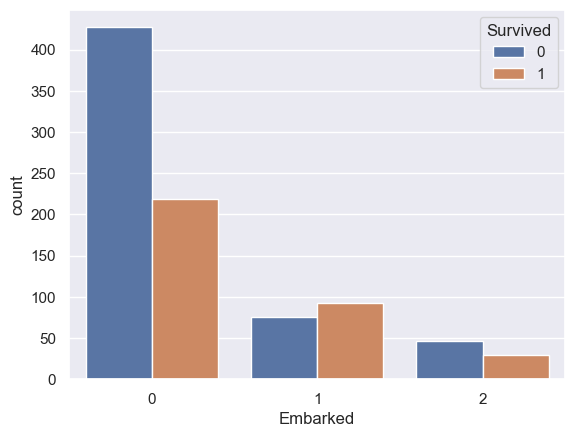

In [22]:
#no of survivals Embarked wise

sns.countplot(x='Embarked', hue='Survived', data=psngr_data)

print(psngr_data[['Embarked', 'Survived']].value_counts())

In [23]:
#Data Preprocessing to prepare for the machine learning model

x_para = psngr_data.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1) #Removing data which not affects the decision on surviving of passanger
y_para = psngr_data['Survived']

In [24]:
#Splitting the preprocessed data into train and test data and target datas

x_train, x_test, y_train, y_test = train_test_split(x_para, y_para, test_size=0.2, random_state=6)

In [25]:
print(x_para.shape, x_train.shape, x_test.shape)

(891, 7) (712, 7) (179, 7)


In [26]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
741,1,0,36.0,1,0,78.8500,0
577,1,1,39.0,1,0,55.9000,0
810,3,0,26.0,0,0,7.8875,0
299,1,1,50.0,0,1,247.5208,1
655,2,0,24.0,2,0,73.5000,0


In [31]:
#Hyperparameter tuning for optimizing and Loading the data into model for model training

#here using RandomForestClassifier and GridSearchCV to predict with the best combinations of parameters

parameters_list = {
    'n_estimators': [50,100,200],        #providing the list of parameters for numbers of trees in the model
    'max_depth': [None, 10,20],       #providing list of parameters for maximum depth of each tress
    'min_samples_split': [2,5,10],        #providing the list of parameters for minimum number of samples to split an internal node
    'min_samples_leaf': [1,4,6]           #providing the list of parameters for minimum number of samples in a leaf node
            }

model = RandomForestClassifier()

gridsearch_model = GridSearchCV(estimator=model, param_grid=parameters_list, cv=5)

gridsearch_model.fit(x_train, y_train)

ml_model = gridsearch_model.best_estimator_


In [45]:
#Model evaluation & Accuracy score

x_train_pred = ml_model.predict(x_train)
train_accuracy = accuracy_score(x_train_pred, y_train)
print(f'The accuracy score for training data is: {train_accuracy*100} %')

y_test_pred = ml_model.predict(x_test)

test_accuracy = accuracy_score(y_test_pred, y_test)

print(f'The accuracy for testing data is: {test_accuracy*100} %')

The accuracy score for training data is: 94.24157303370787 %
The accuracy for testing data is: 86.03351955307262 %


In [42]:
#Prediction system for any one of the row from given data

psngr_info = x_para.iloc[int(input('Select Row-index from the data: '))].to_numpy() #selecting user input for row-index to do a prediction
reshape_psngr_info = psngr_info.reshape(1,-1) #reshaping the data as 2D array from 1D

prediction_system = ml_model.predict(reshape_psngr_info)
prediction_confidence = ml_model.predict_proba(reshape_psngr_info) #generating prediction probability with reference to a considered model

if prediction_system[0]==1:
    print('This passenger will be Survived')
    print(f'The confidence for Survival prediction is {int(prediction_confidence[0][1]*100)} %')
else:
    print('This passanger may not be Survived')
    print(f'The confidence for NOT Surviving prediction is {int(prediction_confidence[0][0]*100)} %')

Select Row-index from the data: 9
This passenger will be Survived
The confidence for Survival prediction is 93 %


C:\Users\praje\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\praje\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [46]:
#CONCLUSION:

#Here I generated the Accuracy of the Testing data as around 86% which is near to 1, hence the suitability of the model can be said as well for the given data.

#The prediction system is giving confidence percentage for the survival prediction, which will ensure how much the prediction is reliable to believe or accept.